# Hantush type curves

## Version 1, as a power series

$$ W_h(u, \rho) = \sum_{n=0}^{\infty}\frac {-1^n} {n!} \left( \frac \rho 2 \right)^{2n} u^{-n} E_{n+1}\left(\frac {\rho^2} {4 u} \right) $$

$$ E_{n+1} = \frac 1 n \left[ e^{-u} - u E_n (u) \right] , \,\,(n=1, 2, 3, ...) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

In [3]:
def Ws(u=None, rho=None):
    w    = 0.
    r2u  = (rho/2) ** 2 / u
    term =  sp.exp1(r2u)
    E0   = sp.exp1(r2u)
    w    = term
    for n in range(1, 11):
        E1 = (1/n) * (np.exp(-r2u) - r2u * E0)
        term = term * (-1)/(n+1) * (rho/2) ** 2 / u * E1/E0
        w += term
        E0 = E1
    return w

In [4]:
Ws(u=0.2, rho=0.1)
sp.exp1(0.2)

1.222650544183893

## Version 2, integration

In [5]:
def W(u, rho):
    if np.isscalar(u):
        u = np.asarray([u])

    w = np.zeros_like(u)
    for i, uu in enumerate(u):
        y = np.logspace(np.log10(uu), 1)
        arg = np.exp(-y - (rho/2) ** 2 / y ) / y
        w[i] = np.sum(np.diff(y) * 0.5 * (arg[:-1]+ arg[1:]))
    return w

In [6]:
W(0.2, 0.1)

array([1.21815738])

In [7]:
np.isscalar(0.3)

True

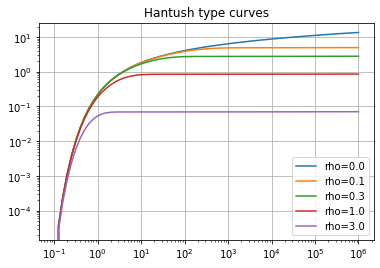

In [8]:
rhos = [0., 0.1, 0.3, 1, 3]

u = np.logspace(-6, 1, 71)

plt.title('Hantush type curves')
plt.xscale('log')
plt.yscale('log')
plt.grid()
for rho in rhos:
    w = W(u, rho)
    plt.plot(1/u, w, label='rho={:.1f}'.format(rho))
    
plt.legend()
plt.show()

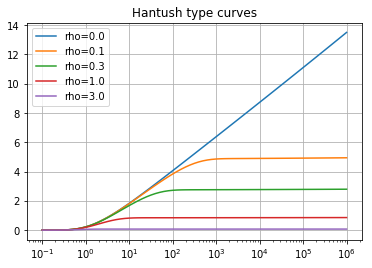

In [67]:
rhos = [0., 0.1, 0.3, 1, 3]

u = np.logspace(-6, 1, 71)

plt.title('Hantush type curves')
plt.xscale('log')
plt.yscale('linear')
plt.grid()
for rho in rhos:
    w = W(u, rho)
    plt.plot(1/u, w, label='rho={:.1f}'.format(rho))
    
plt.legend()
plt.show()